# **Ejercicios de pair programming Módulo 3 Sprint 1**
## **Regresión logística: Lección 3**
### **Ajuste**

In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Modelado y matriz de confusión
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


#  Gestión de warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

pd.options.display.max_columns = None

Es el momento de realizar el ajuste de vuestro modelo, en este caso tendréis que usar el csv que guardastéis ayer después de todo el preprocesamiento. Los objetivos de esta lección son:
 - Realizar el ajuste o ajustes de los modelos


In [2]:
df = pd.read_pickle("../datos/datos-regresion-logistica/2-invistico_airline_procesado.pkl")
df.head()

,age,flight_distance,departure_delay_in_minutes,gender_oe,customer_type_oe,type_of_travel_oe,class_oe,seat_comfort_oe,departure_arrival_time_convenient_oe,food_and_drink_oe,gate_location_oe,inflight_wifi_service_oe,inflight_entertainment_oe,online_support_oe,ease_of_online_booking_oe,on_board_service_oe,leg_room_service_oe,baggage_handling_oe,checkin_service_oe,cleanliness_oe,online_boarding_oe,satisfaction
0,-0.028305,0.301419,-0.386481,1,0,0,0,3,1,1,1,2,3,4,3,3,3,2,4,3,3,0
1,-1.946383,-0.272034,0.926855,1,0,1,1,1,4,1,3,4,1,4,4,2,2,2,5,3,4,0
2,0.236257,-1.265110,-0.386481,0,0,1,1,4,4,3,4,1,4,3,5,5,3,4,2,5,4,1
3,-0.821993,-0.574825,-0.386481,0,1,0,0,0,0,0,2,5,0,5,5,4,4,4,3,4,5,1
4,0.765382,-0.516408,-0.386481,0,0,0,1,4,4,3,4,3,1,4,4,4,4,3,4,4,5,1


In [3]:
# Separamos 'x' e y 'y', y eliminamos nuestra variable respuesta
# Separamos el train y el test para saber si nuestro modelo es bueno

X = df.drop("satisfaction", axis = 1)
y = df["satisfaction"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 137)


In [4]:
# Definimos la Regresión Logística y ajustamos el modelo

log_reg = LogisticRegression(n_jobs=-1, max_iter = 1000)

log_reg.fit(x_train,y_train)

y_pred_train = log_reg.predict(x_train)

y_pred_test = log_reg.predict(x_test)

In [5]:
# Convertimos los datos en dataframe y unimos el train y el test

train_df = pd.DataFrame({'Real': y_train, 'Predicted': y_pred_train, 'Set': ['Train']*len(y_train)})
test_df = pd.DataFrame({'Real': y_test,  'Predicted': y_pred_test,  'Set': ['Test']*len(y_test)})

resultados = pd.concat([train_df,test_df], axis = 0)
resultados.sample(10)

,Real,Predicted,Set
57614,1,1,Train
33411,1,1,Train
80983,0,0,Train
23066,1,1,Train
92521,0,0,Train
99074,0,1,Train
2451,1,1,Train
69477,0,1,Test
3017,1,1,Train
94597,1,0,Train


 - Sacad la matriz de confusión de vuestro modelo e identificad cuáles son los verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos.

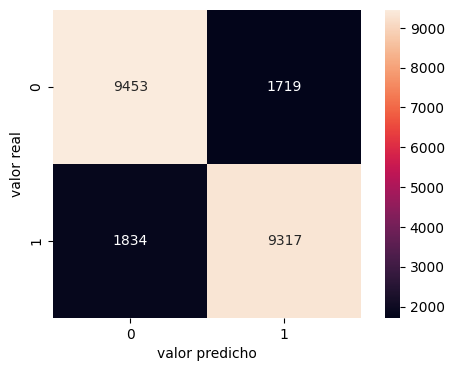

In [6]:
mat = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize = (6, 4))
sns.heatmap(mat, square=True, annot=True, fmt="d", cmap = "rocket")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

**VERDADERO NEGATIVO** --> 9453, es decir, que nuestro modelo ha predicho 9453 veces que un dato iba a ser negativo, y al comprobarlo, era negativo (BIEN PREDICHO)

**FALSO POSITIVO** --> 1719, es decir, que nuestro modelo ha predicho 1719 veces que un dato iba a ser positivo, y al comprobarlo, era negativo (MAL PREDICHO)

**FALSO NEGATIVO** --> 1834, es decir, que nuestro modelo ha predicho 1834 veces que un dato iba a ser negativo, y al comprobarlo, era positivo (MAL PREDICHO)

**VERDADERO POSITIVO** --> 9317, es decir, que nuestro modelo ha predicho 9317 veces que un dato iba a ser positivo, y al comprobarlo, era positivo (BIEN PREDICHO)